30 Nov 2023

# PyCaret Clustering

PyCaret is an open-source library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

It makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

### Index:

The index of this notebook is based on:
- Installation.
- Clustering Module.
    - Setup.
    - Create Model.
    - Assign Labels.
    - Analyze Model.
    - Save Model.
      
## Installation

In [1]:
#!pip install pycaret
#!pip install pycaret[full]
#!pip install pycaret[analysis]
#!pip install pycaret[models]
#!pip install pycaret[tuner]
#!pip install pycaret[mlops]
#!pip install pycaret[parallel]
#!pip install pycaret[test]

# check installed version
import pycaret
pycaret.__version__

'3.2.0'

In [2]:
import pandas as pd

## Clustering Module

PyCaret's Clustering Module is an unsupervised machine learning module that performs the task of grouping a set of objects that the ones in the same cluster are more similar to each other than to those in other groups.

It provides several pre-processing features that prepare the data for modeling through the setup function.

In [3]:
# Loading dataset
dataset = pd.read_csv('casos_lectors_dummies.csv')
dataset.head()

data = dataset.drop(['llibre_recomanat', 'score', 'id_usuari', 'pref_adaptacio_peli_No', 'pref_best_seller_No', 'pref_sagues_No', 'genere_persona_home'], axis=1)
data.head()

,any_naixement,Comedia,Historica,Romance,Ciencia_Ficcio,Ficcio,Fantasia,Ciencia,Creixement_personal,Autoajuda,...,Juvenil,Densa,Fluida,pagines_max,pref_adaptacio_peli_Si,pref_best_seller_Si,genere_persona_altres,genere_persona_dona,pref_sagues_Indiferent,pref_sagues_Si
0,2003,1,1,1,1,1,0,0,0,0,...,0,1,1,350,1,0,0,1,0,0
1,2003,1,1,1,1,1,0,0,0,0,...,0,1,1,350,1,0,0,1,0,0
2,2003,1,1,1,1,1,0,0,0,0,...,0,1,1,350,1,0,0,1,0,0
3,2003,1,1,1,1,1,0,0,0,0,...,0,1,1,350,1,0,0,1,0,0
4,2003,1,1,1,1,1,0,0,0,0,...,0,1,1,350,1,0,0,1,0,0


We have two types of datasets:
- `dataset`: All the atributs with categorical values as dummies except llibre_recomanat.
- `data`: All the atributes except llibre_recomanat, score, id_usuari, pref_adaptacio_peli_No, pref_best_seller_No, pref_sagues_No, genere_persona_home.

We have decided to remove them due to the redundant significance these variables have. Moreover, the binary ones that were removed was because there is the positive class.
  
### Setup

This function initializes the training environment and can create the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has one required parameter i.e. `data`. All the other parameters are optional.

In [4]:
# Import pycaret clustering and init setup
from pycaret.clustering import *

s = setup(data, preprocess=False, session_id = 123) # Not preprocess needed

,Description,Value
0,Session id,123
1,Original data shape,"(144, 21)"
2,Transformed data shape,"(144, 21)"
3,Numeric features,21


Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed data shape:**  Shape of data after transformations. In this case, the has the same shape has original data. <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

In [5]:
# Import ClusteringExperiment and init the class
from pycaret.clustering import ClusteringExperiment

exp = ClusteringExperiment()

# check the type of exp
type(exp)

# init setup on exp
exp.setup(data, preprocess=False, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(144, 21)"
2,Transformed data shape,"(144, 21)"
3,Numeric features,21


### Create Model

This function trains and evaluates the performance of a given model. Metrics evaluated can be accessed using the `get_metrics` function. Custom metrics can be added or removed using the `add_metric` and `remove_metric` function. All the available models can be accessed using the `models` function.

In [6]:
# Check all the available models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


The metrics are:

Here are the descriptions of the clustering metrics in English:

1. **Silhouette Score**: Measures how similar an object is to its own cluster compared to other clusters, with a range from -1 to 1. A higher score indicates a well-defined clustering structure.

2. **Calinski-Harabasz Index**: Evaluates the quality of clustering based on the variance between clusters and within clusters. A higher index value signifies better-defined clusters.

3. **Davies-Bouldin Index**: The lower the value, the better the separation between the clusters. It indicates how well-separated the different clusters are.

4. **Homogeneity**: The proportion of each cluster that contains only members of a single class. A score of 1 means the cluster is perfectly homogeneous.

5. **Rand Index**: Measures the similarity of two clustering assignments, disregarding permutations. A score of 1 indicates complete agreement between the two assignments.

6. **Completeness**: Each member of a class is assigned to the same cluster. A score of 1 indicates that the clustering is completely comprehensive, grouping all members of a class together.

In [7]:
# train hclust model
hclust = create_model('hclust')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8939,417448119502568.2500,0.2127,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [8]:
# train kmeans model
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8939,417448119502568.2500,0.2127,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

### Assign Model
This function assigns cluster labels to the training data, given a trained model.

In [9]:
hclust_cluster = assign_model(hclust)
hclust_cluster

,any_naixement,Comedia,Historica,Romance,Ciencia_Ficcio,Ficcio,Fantasia,Ciencia,Creixement_personal,Autoajuda,...,Densa,Fluida,pagines_max,pref_adaptacio_peli_Si,pref_best_seller_Si,genere_persona_altres,genere_persona_dona,pref_sagues_Indiferent,pref_sagues_Si,Cluster
0,2003,1,1,1,1,1,0,0,0,0,...,1,1,350,1,0,0,1,0,0,Cluster 2
1,2003,1,1,1,1,1,0,0,0,0,...,1,1,350,1,0,0,1,0,0,Cluster 2
2,2003,1,1,1,1,1,0,0,0,0,...,1,1,350,1,0,0,1,0,0,Cluster 2
3,2003,1,1,1,1,1,0,0,0,0,...,1,1,350,1,0,0,1,0,0,Cluster 2
4,2003,1,1,1,1,1,0,0,0,0,...,1,1,350,1,0,0,1,0,0,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2003,1,1,1,1,0,0,0,0,0,...,1,0,350,1,0,0,1,1,0,Cluster 2
140,2003,1,1,1,1,0,0,0,0,0,...,1,0,350,1,0,0,1,1,0,Cluster 2
141,1998,0,0,0,0,0,0,0,1,0,...,0,1,150,0,0,0,0,1,0,Cluster 3
142,1998,0,0,0,0,0,0,0,1,0,...,0,1,150,0,0,0,0,1,0,Cluster 3


In [10]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,any_naixement,Comedia,Historica,Romance,Ciencia_Ficcio,Ficcio,Fantasia,Ciencia,Creixement_personal,Autoajuda,...,Densa,Fluida,pagines_max,pref_adaptacio_peli_Si,pref_best_seller_Si,genere_persona_altres,genere_persona_dona,pref_sagues_Indiferent,pref_sagues_Si,Cluster
0,2003,1,1,1,1,1,0,0,0,0,...,1,1,350,1,0,0,1,0,0,Cluster 0
1,2003,1,1,1,1,1,0,0,0,0,...,1,1,350,1,0,0,1,0,0,Cluster 0
2,2003,1,1,1,1,1,0,0,0,0,...,1,1,350,1,0,0,1,0,0,Cluster 0
3,2003,1,1,1,1,1,0,0,0,0,...,1,1,350,1,0,0,1,0,0,Cluster 0
4,2003,1,1,1,1,1,0,0,0,0,...,1,1,350,1,0,0,1,0,0,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2003,1,1,1,1,0,0,0,0,0,...,1,0,350,1,0,0,1,1,0,Cluster 0
140,2003,1,1,1,1,0,0,0,0,0,...,1,0,350,1,0,0,1,1,0,Cluster 0
141,1998,0,0,0,0,0,0,0,1,0,...,0,1,150,0,0,0,0,1,0,Cluster 3
142,1998,0,0,0,0,0,0,0,1,0,...,0,1,150,0,0,0,0,1,0,Cluster 3


### Analyze Model

We will analyse the model by using `evaluate_model`. It can only be used in Notebook since it uses ipywidget.

In [11]:
# check docstring to see available plots
# help(plot_model)

In [12]:
evaluate_model(hclust) # Seatch for the Cluster t-SNE (3d)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [13]:
evaluate_model(kmeans) # Seatch for the Cluster t-SNE (3d)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [28]:
# Saving the DataFrame as a CSV file
csv_file_path = '/content/dataset.csv'
hclust_cluster.to_csv(csv_file_path, index=False)

csv_file_path

'/content/dataset.csv'

As we can see, the optimal k to divide the clusters is 4, based on `Elbow plot`.

## Save Model

To save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [14]:
# save pipeline
save_model(hclust, 'hclust_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('placeholder', None),
                 ('trained_model', AgglomerativeClustering(n_clusters=4))]),
 'hclust_pipeline.pkl')

In [15]:
# load pipeline
hclust_pipeline = load_model('hclust_pipeline')
hclust_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('placeholder', None),
                ('trained_model', AgglomerativeClustering(n_clusters=4))])

### Cluster analysis

**Hierarchical Clustering**


The data columns are:

In [16]:
data.columns.tolist()

['any_naixement',
 'Comedia',
 'Historica',
 'Romance',
 'Ciencia_Ficcio',
 'Ficcio',
 'Fantasia',
 'Ciencia',
 'Creixement_personal',
 'Autoajuda',
 'Policiaca',
 'Juvenil',
 'Densa',
 'Fluida',
 'pagines_max',
 'pref_adaptacio_peli_Si',
 'pref_best_seller_Si',
 'genere_persona_altres',
 'genere_persona_dona',
 'pref_sagues_Indiferent',
 'pref_sagues_Si']

KeyboardInterrupt: ignored

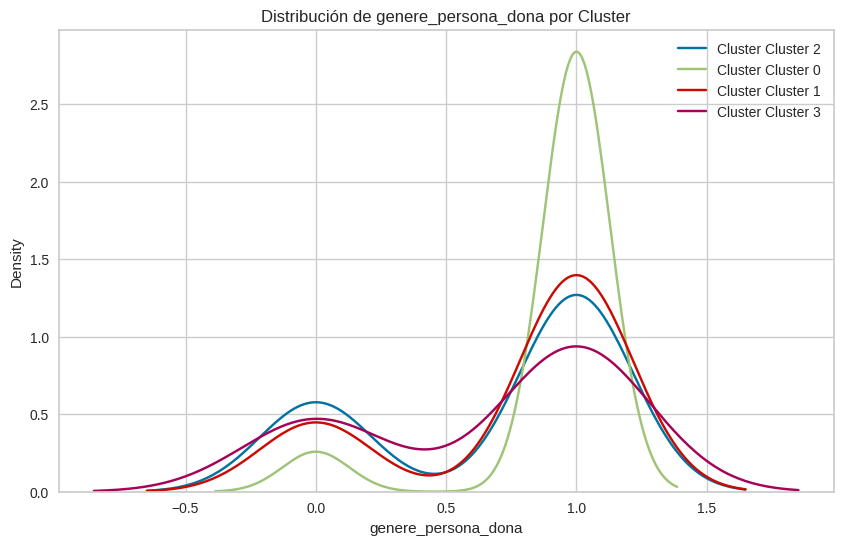

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

PATH_IMG = '/Users/elenaalegretregalado/Desktop/en_curs/Pract_2/images'

for atributo in hclust_cluster.columns[:-1]:  # Excluyendo la columna 'Cluster'
    plt.figure(figsize=(10, 6))

    # Verifica que haya datos para cada cluster antes de graficar
    for cluster in hclust_cluster['Cluster'].unique():
        cluster_data = hclust_cluster[hclust_cluster['Cluster'] == cluster][atributo].dropna()
        if cluster_data.empty:
            continue
        sns.kdeplot(cluster_data, label=f'Cluster {cluster}')

    # Solo muestra la leyenda si hemos graficado algo
    if plt.gca().get_lines():
        plt.title(f'Distribución de {atributo} por Cluster')
        plt.legend()

        # Guardar la figura con el nombre del atributo en el directorio especificado
        plt.savefig(os.path.join(PATH_IMG, f'{atributo}_distribution.png'))

    plt.close()

---
---
